# **주성분 분석(Principal Component Analysis)**

<img src='https://images.unsplash.com/photo-1508050919630-b135583b29ab?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MTF8fHBhcmlzfGVufDB8fDB8fA%3D%3D&auto=format&fit=crop&w=500&q=60'>

- 비지도학습 알고리즘
- 차원축소 알고리즘(dimensionality reduction algorithm)
- 활용분야는 visualization, noise filtering, feature extraction and engineering

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
#plt.rcParams['font.family']='Malgun Gothic'
#plt.rcParams['axes.unicode_minus'] = False

## Feature selection between ML and DL
<img src='https://quantdare.com/wp-content/uploads/2019/06/deep_learning.png' width=600>

### 20차원(20개 변수, 군집은 3개)의 데이터 500를 생성
- 2차 평면에 시각화를 위해서는 임의로 2개 특성으로만 가능**(feature selection)**
- 20개 특성변수를 PCA/SVD 차원 축소 알고리즘으로 2개의 변수(차원)로 생성**(feature extraction)** 하여 시각화가 가능

In [2]:
from sklearn.datasets import make_moons, make_circles, make_blobs

X, y = make_blobs(n_samples=500, centers=3, 
                  n_features=20, cluster_std=2, random_state=1)

print(f'특성행렬(X)의 인스턴스: {X.shape[0]}개, 변수: {X.shape[1]} 개')

print(f'종속변수(y)의 고유값 종류: {np.unique(y)}')

특성행렬(X)의 인스턴스: 500개, 변수: 20 개
종속변수(y)의 고유값 종류: [0 1 2]


<Figure size 1440x360 with 0 Axes>

Text(0.5, 0, 'X1')

Text(0, 0.5, 'X7')

Text(0.5, 1.0, 'Original space')

PCA(n_components=2)

Text(0.5, 0, 'Principal Component 1')

Text(0, 0.5, 'Principal Component 2')

Text(0.5, 1.0, 'PCA mapping space')

TruncatedSVD()

Text(0.5, 0, 'TruncatedSVD Component 1')

Text(0, 0.5, 'TruncatedSVD Component 2')

Text(0.5, 1.0, 'SVD mapping space')

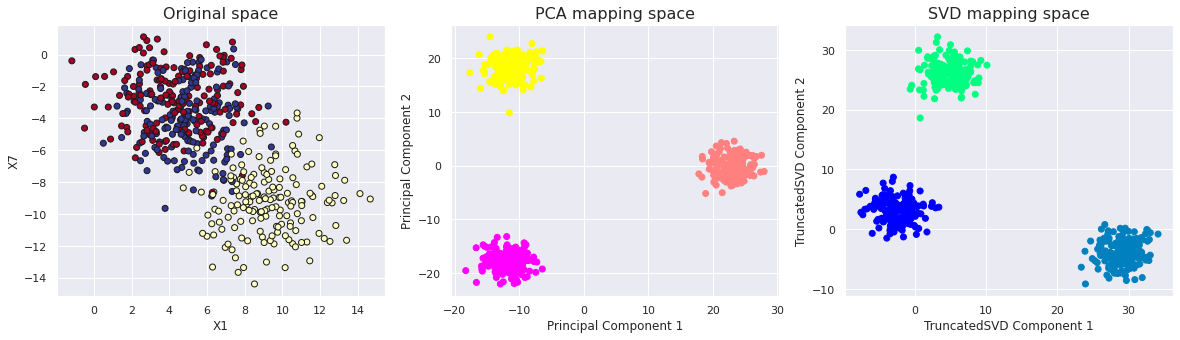

In [3]:
from sklearn.decomposition import PCA, TruncatedSVD

plt.figure(figsize=(20, 5))
####### original space
plt.subplot(131)
plt.scatter(X[:, 1], X[:, 7], c=y, cmap='RdYlBu', edgecolor='k')
plt.xlabel('X1'); plt.ylabel('X7')
plt.title('Original space', fontsize=16)

####### 2개의 주요 component로 PCA 변환
pca = PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)
# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
plt.subplot(132)
plt.scatter(x=x_pca[:,0], y= x_pca[:,1], c= y, cmap='spring')
plt.xlabel('Principal Component 1'); plt.ylabel('Principal Component 2')
plt.title('PCA mapping space', fontsize=16)

######### 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(X)
x_tsvd = tsvd.transform(X)
# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
plt.subplot(133)
plt.scatter(x=x_tsvd[:,0], y= x_tsvd[:,1], c= y, cmap='winter')
plt.xlabel('TruncatedSVD Component 1'); plt.ylabel('TruncatedSVD Component 2')
plt.title('SVD mapping space', fontsize=16)

plt.show()

## **1. 주성분 분석(PCA)과 시각화**
- Linearly transform original data into PCA data projected with PCA basis function

### 원자료의 공분산을 대부분 설명해 줄 수 있도록 낮은 차원으로 데이터를 project하기 위한 **선형변형** 알고리즘(**Linear transformation** to reduce the high dimension into low dimension) 
- 비선형 자료를 변환하는 방법은 manifold 알고리즘
  * Isometric feature mapping(Isomap), Locally Linear Embedding(LLE), Stochastic Neighbor Embedding(SNE)
- Kernel 알고리즘과 심층학습방법(Autoencoder)

<img src='https://miro.medium.com/max/596/1*QinDfRawRskupf4mU5bYSA.png'>

In [26]:
plt.rcParams["figure.figsize"] = (12, 6)

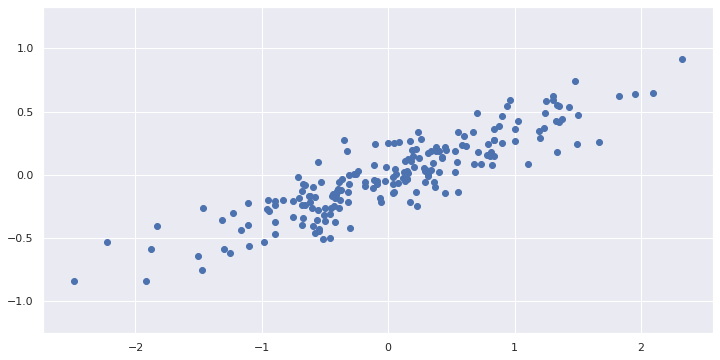

In [27]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1]);
plt.axis('equal');

Scikit-Learn's ``PCA`` estimator를 사용

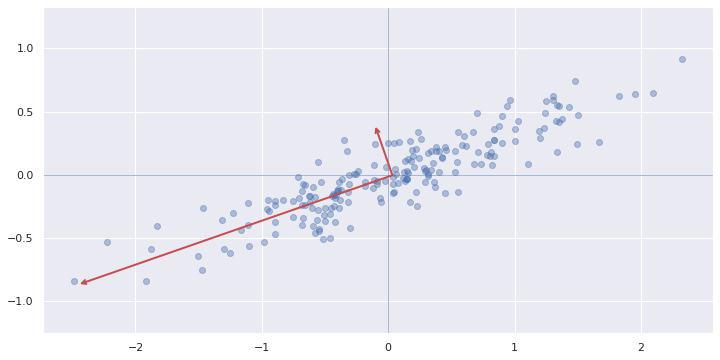

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2, color='r',
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

plt.scatter(X[:, 0], X[:, 1], alpha=0.4)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axvline(0, linewidth=0.5); plt.axhline(0, linewidth=0.5)
plt.axis('equal');

### **주성분 벡터**

In [29]:
pca.components_

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

## **2. 주성분 분석과 선형대수**

In [30]:
X = np.array([[2,3,11], [3,5,8], [4,7,5], [3,5,8]])
X

array([[ 2,  3, 11],
       [ 3,  5,  8],
       [ 4,  7,  5],
       [ 3,  5,  8]])

In [31]:
X_scaled = X- X.mean(0)
X_scaled

array([[-1., -2.,  3.],
       [ 0.,  0.,  0.],
       [ 1.,  2., -3.],
       [ 0.,  0.,  0.]])

In [32]:
np.dot(X_scaled.T, X_scaled)
print('\n')
print(f'원래 데이터의 총변동량(공분산행렬의 trace): {np.trace(np.dot(X_scaled.T, X_scaled))}')

array([[  2.,   4.,  -6.],
       [  4.,   8., -12.],
       [ -6., -12.,  18.]])



원래 데이터의 총변동량(공분산행렬의 trace): 28.0


In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled) 
print('2개의 주성분구성 자료의 공분산, 3 by 3')
(X_pca.T@X_pca).round(2)

PCA(n_components=2)

2개의 주성분구성 자료의 공분산, 3 by 3


array([[28.,  0.],
       [ 0.,  0.]])

In [34]:
print(f'주성분 자료의 총변동량: {np.trace(np.dot(X_pca.T, X_pca))}')
print(f'원래 데이터의 총변동량: {np.trace(np.dot(X_scaled.T, X_scaled))}')

주성분 자료의 총변동량: 28.000000000000007
원래 데이터의 총변동량: 28.0


주성분분석실시 전에는 반드시 자료 표준화**(Importance of Feature Scaling_)**

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py

In [58]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=500, n_classes=2, weights=[0.8, 0.2],
                              n_features = 20, n_informative = 5, n_redundant = 15,
                              random_state=1)

print(X.shape)

(500, 20)


In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X) # 평균조정된 X
print(f'평균: {X_scaled.mean(0).round(2)}, 표준편차: {X_scaled.std(0)}')

평균: [-0. -0. -0. -0. -0.  0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0.  0.  0.
  0. -0.], 표준편차: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [60]:
X_scaled.mean(0)
print('\n')
X_scaled.std(0)

array([-9.32587341e-18, -6.31272812e-16, -4.52970994e-17, -1.59872116e-16,
       -1.20903287e-16,  2.15605311e-16, -4.13447054e-16, -5.08482145e-16,
        8.47100168e-17, -3.18321758e-16, -5.06039655e-16, -2.38697950e-17,
       -1.75415238e-17,  4.79616347e-17, -2.79332113e-16,  7.34967642e-17,
        6.88338275e-18,  9.32587341e-16,  1.46771484e-16, -4.26325641e-17])

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

<BarContainer object of 20 artists>

Text(0.5, 0, 'The number of principal components')

Text(0, 0.5, 'The cumulative ratios of total variances')

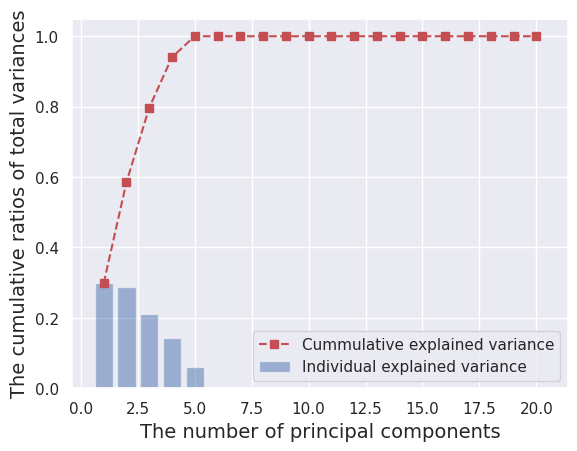

In [64]:
from sklearn.decomposition import PCA

X_pca = PCA().fit(X_scaled)

plt.plot(np.arange(1, X_scaled.shape[1]+1), np.cumsum(X_pca.explained_variance_ratio_), 'rs--', label='Cummulative explained variance')
plt.bar(np.arange(1,len(X_pca.explained_variance_ratio_)+1), X_pca.explained_variance_ratio_, 
        alpha=0.5, align='center', label='Individual explained variance')
plt.xlabel('The number of principal components', fontsize='14')
plt.ylabel('The cumulative ratios of total variances', fontsize='14')
plt.legend()

In [39]:
X_pca.explained_variance_ratio_
print('\n')
np.sum(X_pca.explained_variance_ratio_[:5])

array([2.97832936e-01, 2.87136894e-01, 2.11795369e-01, 1.43686655e-01,
       5.95481460e-02, 1.85588758e-32, 8.98772953e-33, 6.39788430e-33,
       4.31140702e-33, 1.75735911e-33, 1.29609739e-33, 1.08394820e-33,
       1.04649925e-33, 9.91843851e-34, 9.53502576e-34, 8.41291933e-34,
       7.60497699e-34, 6.88390726e-34, 6.11413093e-34, 3.72218475e-34])

1.0

### **주성분 3개 적용**

In [40]:
pca = PCA(n_components=3)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled) 
print('3개의 주성분구성 자료의 공분산, 3 by 3')
(X_pca.T@X_pca).round(2)

PCA(n_components=3)

3개의 주성분구성 자료의 공분산, 3 by 3


array([[2978.33,   -0.  ,    0.  ],
       [  -0.  , 2871.37,   -0.  ],
       [   0.  ,   -0.  , 2117.95]])

In [41]:
print(f'주성분 자료의 총변동량: {np.trace(np.dot(X_pca.T, X_pca))}')
print(f'원래 데이터의 총변동량: {np.trace(np.dot(X_scaled.T, X_scaled))}')

주성분 자료의 총변동량: 7967.651987498316
원래 데이터의 총변동량: 10000.0


## **3. 주성분 분석(PCA)과 Eigenvalues and eigenvectors**
- The eigenvalues of matrix A are values of λ that satisfy the equation

<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/17f01da2e017cf67290e4b2052126122c1a27934' width=200>

### eigenvalues($λ$) = pca.explained_variance_ in scikit-learn
- The eigenvalues($λ$) represent the variance in the direction of the eigenvector.

### eigenvector($V$) = pca.components_ in scikit-learn

### **${ⱽ}^{-1}*A*{ⱽ} = {λ}$**

In [42]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000)
n_samples = X.shape[0]

pca = PCA(n_components=3)
X_transformed = pca.fit_transform(X)

# We center the data and compute the sample covariance matrix.
X_centered = X - np.mean(X, axis=0)
cov_matrix = np.dot(X_centered.T, X_centered) / n_samples
eigenvalues = pca.explained_variance_
for eigenvalue, eigenvector in zip(eigenvalues, pca.components_):    
    print('v-1*A*v = ', np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))
    print('lambda(eigenvalue) = ', eigenvalue)
    print('*'*50)

v-1*A*v =  4.2175067755218745
lambda(eigenvalue) =  4.22172806086475
**************************************************
v-1*A*v =  1.481842272106216
lambda(eigenvalue) =  1.4831193775616272
**************************************************
v-1*A*v =  1.1796603251053701
lambda(eigenvalue) =  1.1796097783981903
**************************************************


## 주성분(Principal Componnents)의 선형대수 의미
- 기존 변수들을 선형 조합한 새로운 변수
- 좌표축을 회전하여 새로운 변수 (새로운 좌표) 생성
- 기존 변수들의 총변동과 새로운 변수의 총변동은 동일
- 총변동의 대부분을 설명하는 소수의 새로운 변수를 찾는 것이 목적

<img src = 'https://wikimedia.org/api/rest_v1/media/math/render/svg/25d526099011bbd1f25ca18d062053b519c4ca1c'>
<img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Eigenvalue_equation.svg/500px-Eigenvalue_equation.svg.png'>

<img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/f/f7/Eigenvectors_of_a_linear_operator.gif/400px-Eigenvectors_of_a_linear_operator.gif'>

<img src = 'https://upload.wikimedia.org/wikipedia/commons/0/06/Eigenvectors.gif'>

## **4. 주성분(PCA)와 이미지 축약**
- 주성분 분석을 위한 알고리즘 소개

   * (1) 분광 분해(Spectral decomposition) : 요인분석(factor analysis)
   * (2) 특이치 분해(Singular Value Decomposition) : Scikit-learn API
   * (3) 축소된 특이치 분해(Truncated SVD)
   
 https://angeloyeo.github.io/2019/08/01/SVD.html

In [43]:
from scipy import misc
sns.reset_defaults() 
img_array = misc.face()
red_array = img_array[:, :, 0] #img_gray = img_array @ [0.2126, 0.7152, 0.0722]
# green_array = img_array[:, :, 1], blue_array = img_array[:, :, 2]
img_array.shape
red_array.shape

(768, 1024, 3)

(768, 1024)

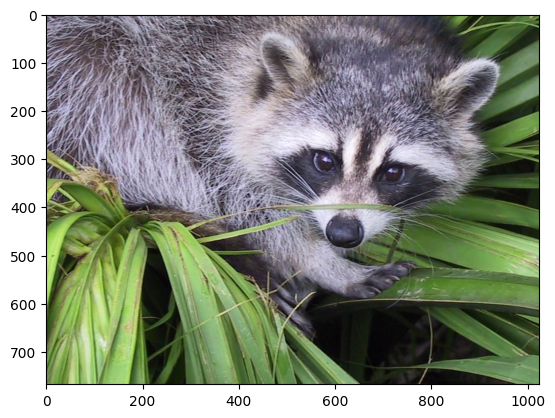

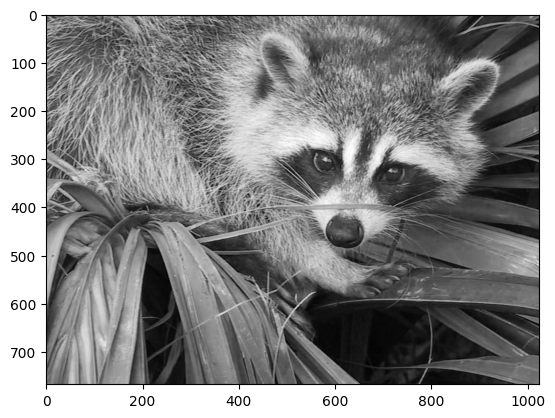

In [44]:
plt.imshow(img_array, cmap="gray"); plt.show()
plt.imshow(red_array, cmap="gray")

## **5. 주성분(PCA)과 기저변수의 시각화**
- Hand-written digits
고차원 자료인 수기체 이미지에 PCA 적용
8×8 pixel images 자료, 총 64차원
2 개의 주성분으로 2차원 평면에서 이미지 기호(0~9) 확인
- 주성분은 **basis function의 기저변수(The basis function)** 역할


64차원 원자료   크기: (1797, 64)
 2차원 축소자료 크기: (1797, 2)


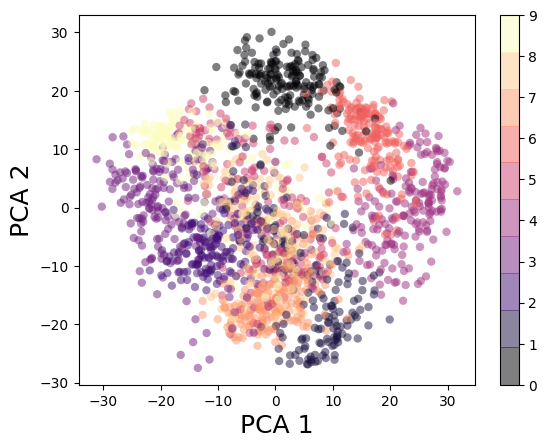

In [45]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
digits = load_digits()

pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(f'64차원 원자료   크기: {digits.data.shape}')
print(f' 2차원 축소자료 크기: {projected.shape}')

plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('magma', 10))
plt.xlabel('PCA 1', fontsize=18); plt.ylabel('PCA 2', fontsize=18)
plt.colorbar();

원래 데이터(64 차원)에서 가장 큰 분산을 갖는 방향을 2개의 주성분에 의한 각 데이터 포인트의 투영입니다.
- 개념적으로 64 차원 공간에서 최적의 확장 및 회전 선형변환을 발견하여 2차원에서 거의 완벽하게 비지도 학습하여 구분에 성공

### 주성분의 의미

64차원의 벡터로 이루어진 원자료를
$$
x = [x_1, x_2, x_3 \cdots x_{64}]
$$

차원이 축소된 주성분으로 총 변동량을 대부분 설명이 가능하다. 64차원의 변수의 선형결합으로 원자료는 아래와 같이 표현

$$
{\rm image}(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots x_{64} \cdot{\rm (pixel~64)}
$$

원자료의 90%를 표현할 수 있는 주성분(새로운 기저변수)

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$

PCA는 최적의 기저변수와 각 기저변수의 계수로 이루어진 함수를 찾는 과정(optimal basis functions)

## **6. 주성분(PCA)와 자료 복원**
- PCA 알고리즘을 사용하여  high dimensionality 데이터를 저차원의 데이터로 빠르고 효율적으로 인식하여 원래데이터로 복원할 수있다.
  * 얼굴인식, 이미지복원 등 분야에서 활용

In [46]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

PCA(n_components=2)

original shape:    (1000, 20)
transformed shape: (500, 2)


##### 20차원의 원자료를 2차원으로 축소한 주성분으로 inverse transform하여 원자료를 복원하여  원자료와 같이 표현

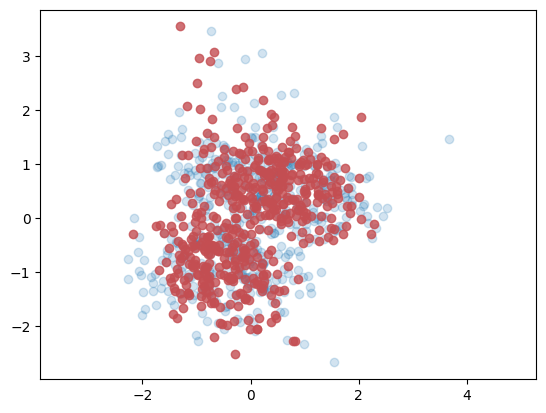

In [48]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, color='r')
plt.axis('equal');

- 옅은 색은 원자료이고 붉은 색은 projected version임
- 총변동량은 가장 많이 설명하는 주성분으로 복원하면 거의 원자료와 비슷하게 됨

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

원래 이미지 자료의 차원: (1348, 62, 47)


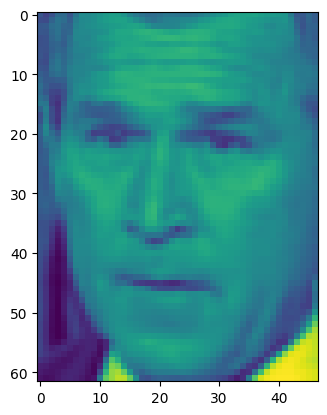

In [49]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import TruncatedSVD
faces = fetch_lfw_people(min_faces_per_person=60)
faces.keys()
print(f'원래 이미지 자료의 차원: {faces.images.shape}')
plt.imshow(faces.images[1])

## **7. 주성분(PCA)과 노이즈 제거(Noise Filtering)**

- 잡음(noise)의 영향보다 훨씬 큰 분산을 가진 주성분은 상대적으로 잡음의 영향을 받지 않고 주성분을 사용하여 데이터를 재구성하는 경우 우선적으로 신호를 유지하고 노이즈를 제거하게 됨

잡음(noise)를 발생시켜 데이터에 주입

- 잡음이 있는 이미지는 손상되었지만 50% 총변동량을 갖는 주성분 개수 12개를 추출
- 주성분의 inverse of the transform으로 이미지를 filtering하여 데이터를 복원
- 고차원 자료(very high-dimensional data)로 예측하는 대신 원자료의 총변동량을 대부분 설명하는 주성분으로 표현(representation)이 가능

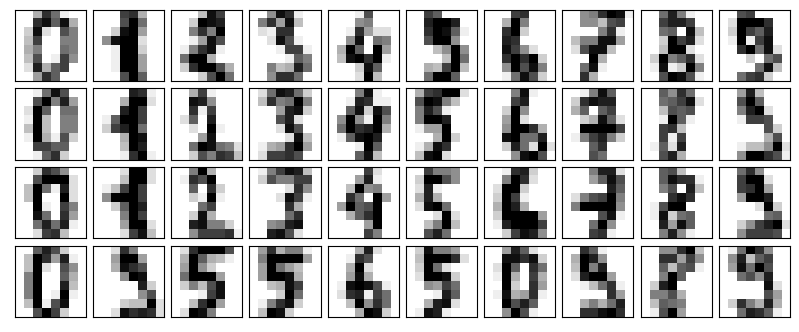

In [50]:
from sklearn.datasets import load_digits
digits = load_digits()

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

원자료 총변동량의 50%를 설명하는 주성분 개수: 9


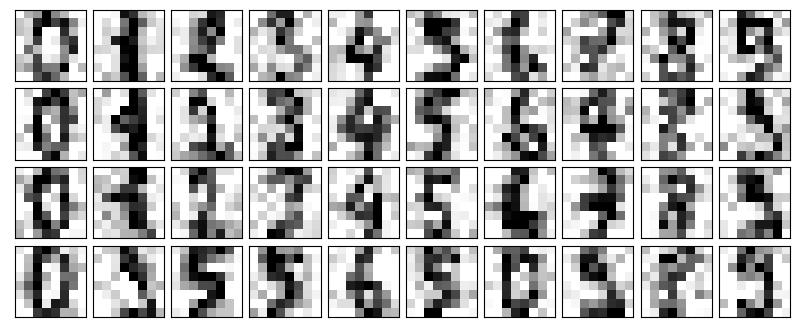

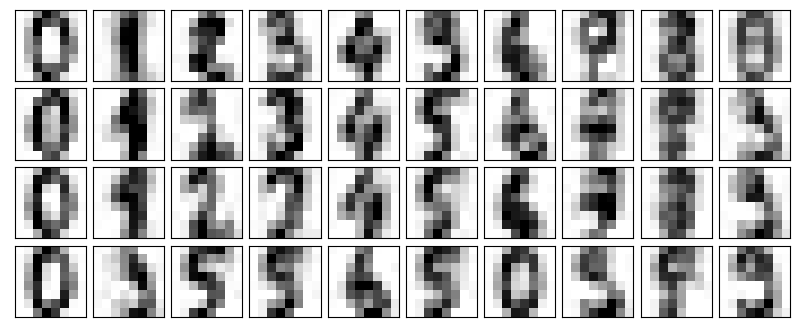

In [51]:
noisy = np.random.normal(digits.data, 3)
pca = PCA(0.50).fit(noisy)
print(f'원자료 총변동량의 50%를 설명하는 주성분 개수: {pca.n_components_}')
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(noisy); plt.show()
plot_digits(filtered)

## **8. SVD와 eigenface 실습예제**
### SVD(singular value decomposition)은 정방형행렬이 아닌 행렬을 3개의 행렬로 인수분해(decomposition)하여 차원을 축소
### 이미지 압축, 복원, 텍스트마이닝의 Topic Model에 응용
https://en.wikipedia.org/wiki/Singular_value_decomposition

<img src='https://wikimedia.org/api/rest_v1/media/math/render/svg/3315de0d8549ccefd4c619e4e6cce6ba041dde3c'>
<img src='https://raw.githubusercontent.com/angeloyeo/angeloyeo.github.io/master/pics/2019-08-01_SVD/pic_SVD.png'>

<img src='https://miro.medium.com/max/1400/0*hVJJfuJiS8Wk7jC7'>

### Truncated SVD 로 차원축소

In [52]:
pca = TruncatedSVD(150)
pca.fit(faces.data)
faces_svd = pca.fit(faces.data).transform(faces.data)
faces_svd.shape

TruncatedSVD(n_components=150)

(1348, 150)

총 150개의 주성분중에서 24개의 주성분(eigenvectors)을 살펴보면, 즉 24개의 "eigenfaces"

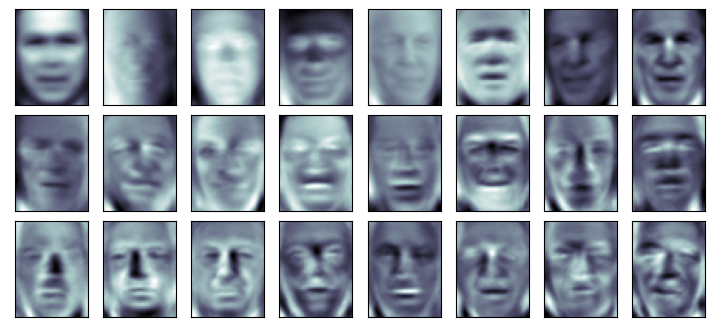

In [53]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

- 왼쪽 윗편은 주성분얼굴 : 얼굴에 비치는 빛의 각도
- 나머자 주성분얼굴 : 눈, 코, 입술

주성분 개수와 누적 총변동량

<BarContainer object of 150 artists>

Text(0.5, 0, 'The number of PCA')

Text(0, 0.5, 'The cummulative total explained variance ratio')

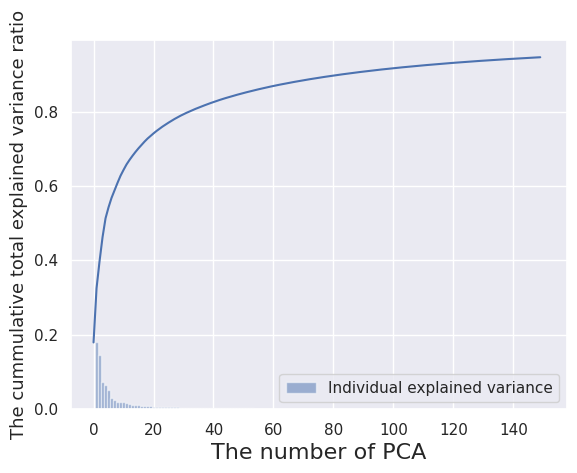

In [57]:
sns.set()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.bar(np.arange(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, 
        alpha=0.5, align='center', label='Individual explained variance')
plt.xlabel('The number of PCA', fontsize='16'); plt.ylabel('The cummulative total explained variance ratio', fontsize='13')
plt.legend()

150개의 주성분으로 90%이상의 원자료 변동량을 설명하고 있어 주성분 150개로 원래 이미지를 복원 

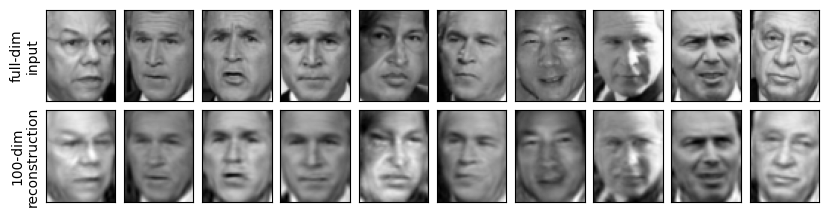

In [ ]:
projected = pca.inverse_transform(faces_svd)

# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('100-dim\nreconstruction');

## **8. 주성분 분석(PCA) 요약**
- In this section we have discussed the use of principal component analysis for ,<b>dimensionality
reduction, for visualization of high-dimensional data, for noise filtering, and
for feature selection within high-dimensional data</b>. 
- Given any high-dimensional dataset, I tend to start with PCA in
order to visualize the relationship between points (as we did with the digits), to <b>understand the main variance in the data (as we did with the eigenfaces), and to understand the intrinsic dimensionality (by plotting the explained variance ratio)</b>.
- Certainly PCA is not useful for every high-dimensional dataset, but it offers a straightforward and efficient path to gaining insight into high-dimensional data. PCA’s main weakness is that it tends to <b>be highly affected by outliers</b> in the data. For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components.

## **9. 원자료가 비선형일 경우 : Kernel Principal Component Analysis (KPCA)**
## Projecting data: PCA vs. KernelPCA
### 원자료(original space에서 비선형자료형태일 경우)

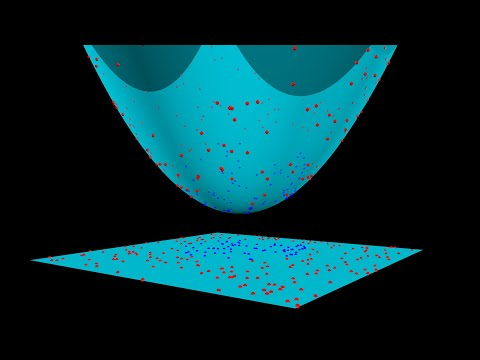

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('3liCbRZPrZA', height='600', width='1000')

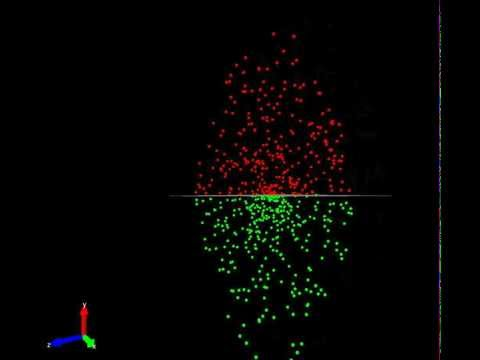

In [ ]:
YouTubeVideo('ndNE8he7Nnk', height='600', width='1000')

In [74]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=1000, noise=0.02, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

Text(0, 0.5, 'Feature #1')

Text(0.5, 0, 'Feature #0')

Text(0.5, 1.0, 'Training data')

Text(0.5, 0, 'Feature #0')

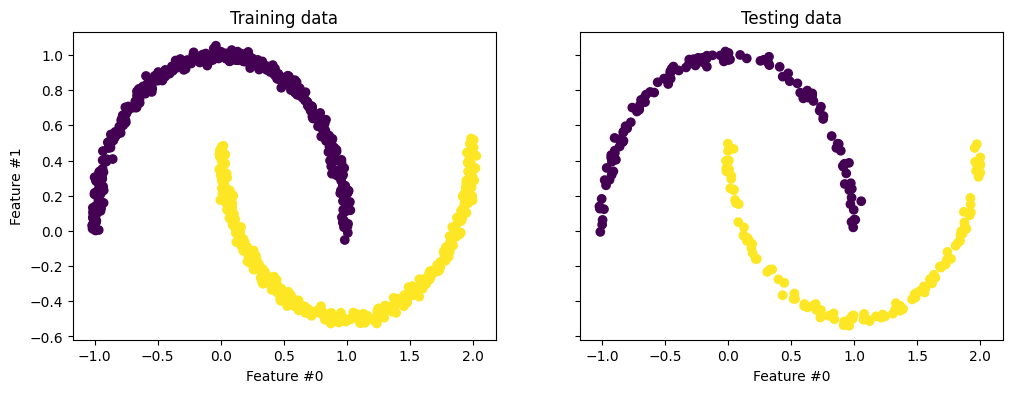

In [78]:
sns.reset_defaults()

_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(12, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")

In [79]:
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=2)
kernel_pca = KernelPCA(n_components=None, kernel="rbf", gamma=15, fit_inverse_transform=True, alpha=0.1)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

Text(0, 0.5, 'Feature #1')

Text(0.5, 0, 'Feature #0')

Text(0.5, 1.0, 'Testing data')

Text(0, 0.5, 'Principal component #1')

Text(0.5, 0, 'Principal component #0')

Text(0.5, 1.0, 'Projection of testing data\n using PCA')

Text(0, 0.5, 'Principal component #1')

Text(0.5, 0, 'Principal component #0')

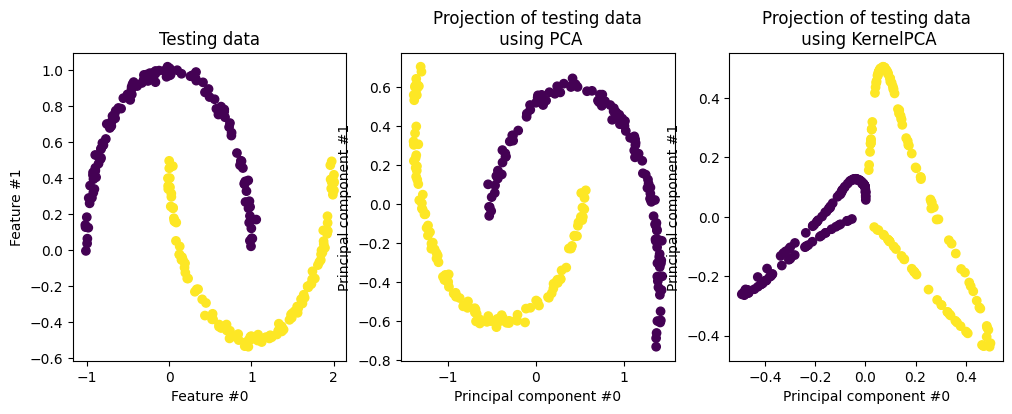

In [85]:
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=3, figsize=(12, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using PCA")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test)
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")

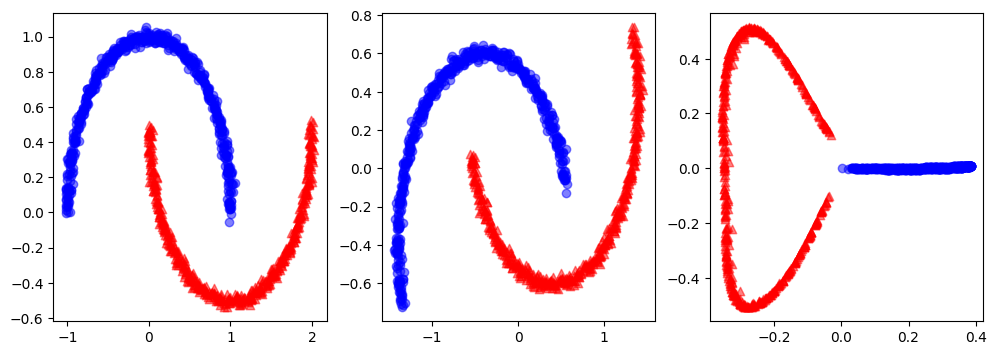

In [84]:
X_pca = pca.fit_transform(X)
X_kernel_pca = kernel_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
ax[0].scatter(X[y ==1, 0], X[y ==1, 1], color='red', marker='^', alpha=0.5)
ax[0].scatter(X[y ==0, 0], X[y ==0, 1], color='blue', marker='o', alpha=0.5)

ax[1].scatter(X_pca[y ==1, 0], X_pca[y ==1, 1], color='red', marker='^', alpha=0.5)
ax[1].scatter(X_pca[y ==0, 0], X_pca[y ==0, 1], color='blue', marker='o', alpha=0.5)

ax[2].scatter(X_kernel_pca[y ==1, 0], X_kernel_pca[y ==1, 1], color='red', marker='^', alpha=0.5)
ax[2].scatter(X_kernel_pca[y ==0, 0], X_kernel_pca[y ==0, 1], color='blue', marker='o', alpha=0.5)

### 원자료를 unfold하는 것이 목적이라면 PCA와 Kernel PCA로 원자료를 변형하여 비교

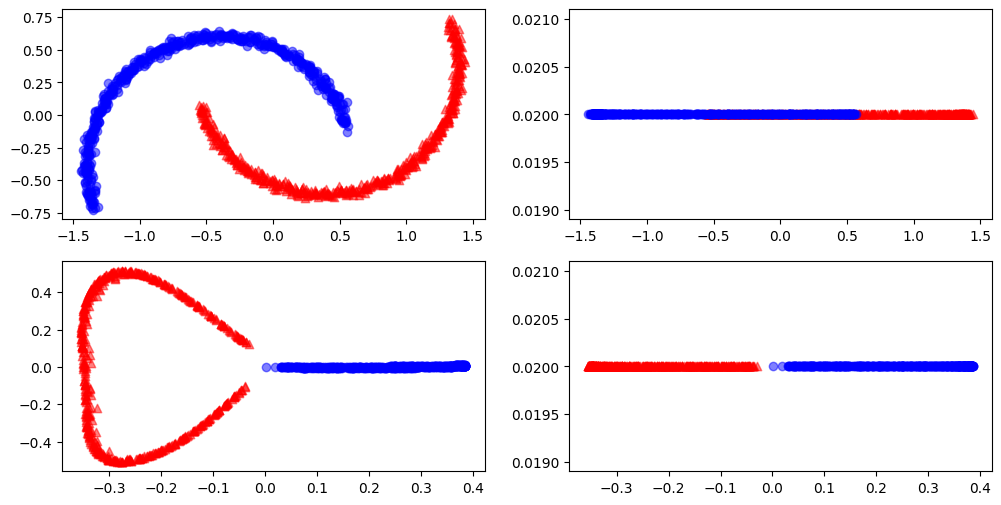

In [83]:
X_pca = pca.fit_transform(X)
X_kernel_pca = kernel_pca.fit_transform(X)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,6))

ax[0][0].scatter(X_pca[y ==1, 0], X_pca[y ==1, 1], color='red', marker='^', alpha=0.5)
ax[0][0].scatter(X_pca[y ==0, 0], X_pca[y ==0, 1], color='blue', marker='o', alpha=0.5)
ax[0][1].scatter(X_pca[y ==1, 0], np.zeros((500,1)) + 0.02, color='red', marker='^', alpha=0.5)
ax[0][1].scatter(X_pca[y ==0, 0], np.zeros((500,1)) + 0.02, color='blue', marker='o', alpha=0.5)


ax[1][0].scatter(X_kernel_pca[y ==1, 0], X_kernel_pca[y ==1, 1], color='red', marker='^', alpha=0.5)
ax[1][0].scatter(X_kernel_pca[y ==0, 0], X_kernel_pca[y ==0, 1], color='blue', marker='o', alpha=0.5)
ax[1][1].scatter(X_kernel_pca[y ==1, 0], np.zeros((500,1)) + 0.02, color='red', marker='^', alpha=0.5)
ax[1][1].scatter(X_kernel_pca[y ==0, 0], np.zeros((500,1)) + 0.02, color='blue', marker='o', alpha=0.5)

## **10. 지도학습과 PCA**
- https://scikit-learn.org/stable/auto_examples/index.html#decomposition-examples 

Pipeline(steps=[('pca', PCA(n_components=2)), ('gaussiannb', GaussianNB())])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2)), ('gaussiannb', GaussianNB())])


Prediction accuracy for the normal test dataset with PCA
81.48%


Prediction accuracy for the standardized test dataset with PCA
98.15%


PC 1 without scaling:
[ 1.76342917e-03 -8.35544737e-04  1.54623496e-04 -5.31136096e-03
  2.01663336e-02  1.02440667e-03  1.53155502e-03 -1.11663562e-04
  6.31071580e-04  2.32645551e-03  1.53606718e-04  7.43176482e-04
  9.99775716e-01]

PC 1 with scaling:
[ 0.13443023 -0.25680248 -0.0113463  -0.23405337  0.15840049  0.39194918
  0.41607649 -0.27871336  0.33129255 -0.11383282  0.29726413  0.38054255
  0.27507157]


Text(0.5, 1.0, 'Training dataset after PCA')

Text(0.5, 1.0, 'Standardized training dataset after PCA')

Text(0.5, 0, '1st principal component')

Text(0, 0.5, '2nd principal component')

Text(0.5, 0, '1st principal component')

Text(0, 0.5, '2nd principal component')

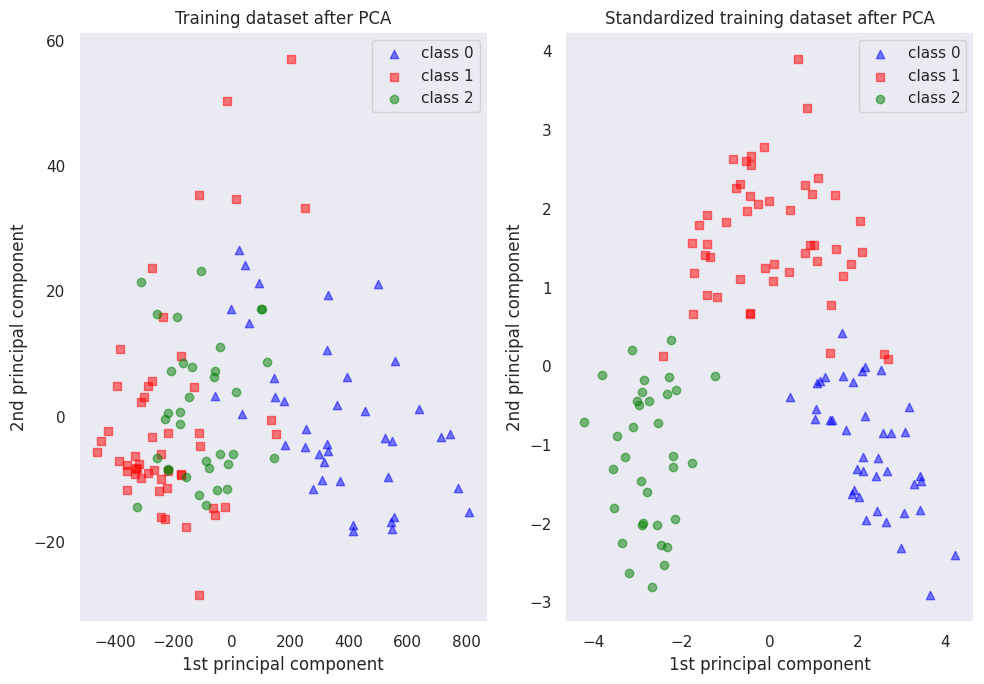

In [72]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline

# Code source: Tyler Lanigan <tylerlanigan@gmail.com>
#              Sebastian Raschka <mail@sebastianraschka.com>

# License: BSD 3 clause

RANDOM_STATE = 42
FIG_SIZE = (10, 7)


features, target = load_wine(return_X_y=True)

# Make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.30, random_state=RANDOM_STATE
)

# Fit to data and predict using pipelined GNB and PCA
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

# Fit to data and predict using pipelined scaling, GNB and PCA
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

# Show prediction accuracies in scaled and unscaled data.
print("\nPrediction accuracy for the normal test dataset with PCA")
print(f"{accuracy_score(y_test, pred_test):.2%}\n")

print("\nPrediction accuracy for the standardized test dataset with PCA")
print(f"{accuracy_score(y_test, pred_test_std):.2%}\n")

# Extract PCA from pipeline
pca = unscaled_clf.named_steps["pca"]
pca_std = std_clf.named_steps["pca"]

# Show first principal components
print(f"\nPC 1 without scaling:\n{pca.components_[0]}")
print(f"\nPC 1 with scaling:\n{pca_std.components_[0]}")

# Use PCA without and with scale on X_train data for visualization.
X_train_transformed = pca.transform(X_train)

scaler = std_clf.named_steps["standardscaler"]
scaled_X_train = scaler.transform(X_train)
X_train_std_transformed = pca_std.transform(scaled_X_train)

# visualize standardized vs. untouched dataset with PCA performed
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)

target_classes = range(0, 3)
colors = ("blue", "red", "green")
markers = ("^", "s", "o")

for target_class, color, marker in zip(target_classes, colors, markers):
    ax1.scatter(
        x=X_train_transformed[y_train == target_class, 0],
        y=X_train_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

    ax2.scatter(
        x=X_train_std_transformed[y_train == target_class, 0],
        y=X_train_std_transformed[y_train == target_class, 1],
        color=color,
        label=f"class {target_class}",
        alpha=0.5,
        marker=marker,
    )

ax1.set_title("Training dataset after PCA")
ax2.set_title("Standardized training dataset after PCA")

for ax in (ax1, ax2):
    ax.set_xlabel("1st principal component")
    ax.set_ylabel("2nd principal component")
    ax.legend(loc="upper right")
    ax.grid()

plt.tight_layout()

plt.show()

## **11. Different Uses of Dimensionality Reduction**
- https://towardsdatascience.com/11-different-uses-of-dimensionality-reduction-4325d62b4fa6

## **12. Dimensionality Reduction — PCA, ICA and Manifold learning**
- https://techairesearch.com/dimensionality-reduction-pca-ica-and-manifold-learning/

# END